In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
SFR_ForSale = pd.read_csv(r"C:\Users\Griffin Ziegler\Desktop\DA12\projects\rental-capstone\data\Metro_invt_fs_uc_sfr_month.csv")

In [3]:
ALL_ForSale = pd.read_csv(r"C:\Users\Griffin Ziegler\Desktop\DA12\projects\rental-capstone\data\Metro_invt_fs_uc_sfrcondo_month.csv")

In [4]:
print(SFR_ForSale)

     RegionID  SizeRank       RegionName RegionType StateName  2018-01-31  \
0      102001         0    United States    country       NaN   1206652.0   
1      394913         1     New York, NY        msa        NY     49048.0   
2      753899         2  Los Angeles, CA        msa        CA     16116.0   
3      394463         3      Chicago, IL        msa        IL     27301.0   
4      394514         4       Dallas, TX        msa        TX     22001.0   
..        ...       ...              ...        ...       ...         ...   
923    753929       935       Zapata, TX        msa        TX        58.0   
924    394743       936    Ketchikan, AK        msa        AK        67.0   
925    753874       937        Craig, CO        msa        CO       117.0   
926    395188       938       Vernon, TX        msa        TX        22.0   
927    394767       939       Lamesa, TX        msa        TX        31.0   

     2018-02-28  2018-03-31  2018-04-30  2018-05-31  ...  2023-11-30  \
0  

In [5]:
SFR_ForSale_melted = SFR_ForSale.melt(id_vars=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"],
                    var_name="Date", value_name="Value")

ALL_ForSale_melted = ALL_ForSale.melt(id_vars=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"],
                    var_name="Date", value_name="Value")

In [6]:
SFR_ForSale_melted['Date'] = pd.to_datetime(SFR_ForSale_melted['Date'])

ALL_ForSale_melted['Date'] = pd.to_datetime(SFR_ForSale_melted['Date'])

In [7]:
print(SFR_ForSale_melted.head())
print(ALL_ForSale_melted.head())

   RegionID  SizeRank       RegionName RegionType StateName       Date  \
0    102001         0    United States    country       NaN 2018-01-31   
1    394913         1     New York, NY        msa        NY 2018-01-31   
2    753899         2  Los Angeles, CA        msa        CA 2018-01-31   
3    394463         3      Chicago, IL        msa        IL 2018-01-31   
4    394514         4       Dallas, TX        msa        TX 2018-01-31   

       Value  
0  1206652.0  
1    49048.0  
2    16116.0  
3    27301.0  
4    22001.0  
   RegionID  SizeRank       RegionName RegionType StateName       Date  \
0    102001         0    United States    country       NaN 2018-01-31   
1    394913         1     New York, NY        msa        NY 2018-01-31   
2    753899         2  Los Angeles, CA        msa        CA 2018-01-31   
3    394463         3      Chicago, IL        msa        IL 2018-01-31   
4    394514         4       Dallas, TX        msa        TX 2018-01-31   

       Value  
0  13

In [8]:
merged_df = pd.merge(ALL_ForSale_melted, SFR_ForSale_melted, on=['RegionID','SizeRank','RegionName','RegionType','StateName','Date'], suffixes=('_ALL', '_SFR'))

merged_df['Non_SFR_Value'] = merged_df['Value_ALL'] - merged_df['Value_SFR']

print(merged_df[['RegionID', 'Date', 'Non_SFR_Value']].head())

   RegionID       Date  Non_SFR_Value
0    102001 2018-01-31       154105.0
1    394913 2018-01-31        17482.0
2    753899 2018-01-31         3777.0
3    394463 2018-01-31         7332.0
4    394514 2018-01-31         1047.0


In [9]:
merged_df['Non_SFR_Value'] = merged_df['Non_SFR_Value'].clip(lower=0)

print(merged_df[['RegionID', 'Date', 'Non_SFR_Value']].head())

   RegionID       Date  Non_SFR_Value
0    102001 2018-01-31       154105.0
1    394913 2018-01-31        17482.0
2    753899 2018-01-31         3777.0
3    394463 2018-01-31         7332.0
4    394514 2018-01-31         1047.0


In [10]:
print(merged_df.columns)

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'Date',
       'Value_ALL', 'Value_SFR', 'Non_SFR_Value'],
      dtype='object')


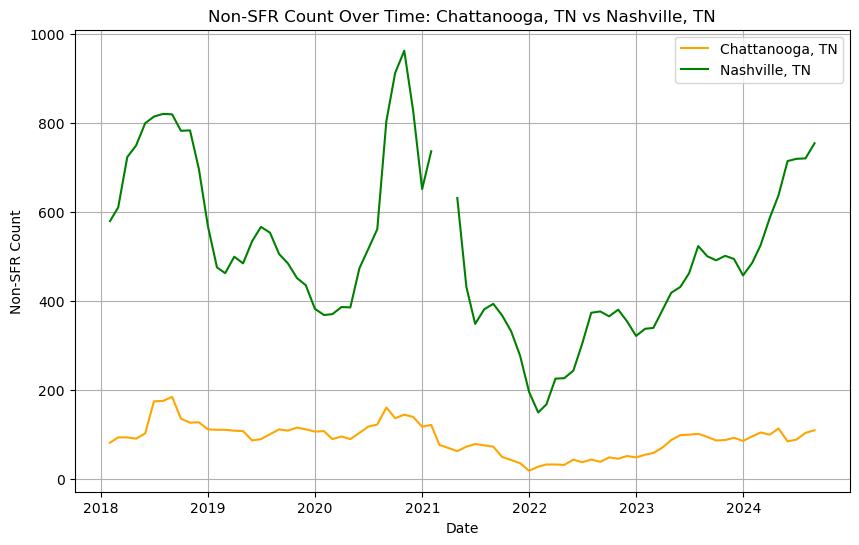

In [11]:
nash_data = merged_df[merged_df['RegionName'] == 'Nashville, TN']
chatt_data = merged_df[merged_df['RegionName'] == 'Chattanooga, TN']

plt.figure(figsize=(10,6))

plt.plot(chatt_data['Date'], chatt_data['Non_SFR_Value'], label='Chattanooga, TN', color='orange')

plt.plot(nash_data['Date'], nash_data['Non_SFR_Value'], label='Nashville, TN', color='green')

plt.title('Non-SFR Count Over Time: Chattanooga, TN vs Nashville, TN')
plt.xlabel('Date')
plt.ylabel('Non-SFR Count')
plt.grid(True)
plt.legend()
plt.show()

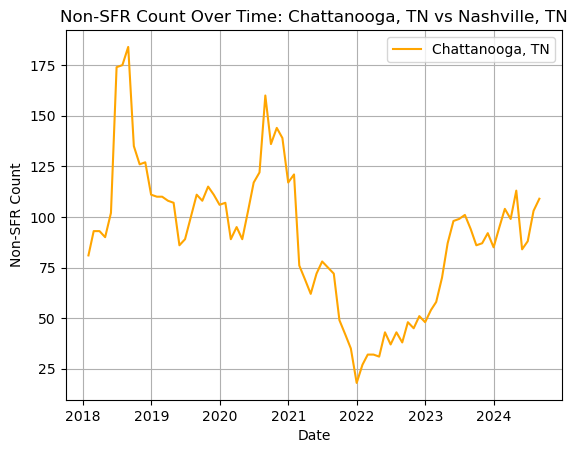

In [13]:
chatt_data = merged_df[merged_df['RegionName'] == 'Chattanooga, TN']
plt.plot(chatt_data['Date'], chatt_data['Non_SFR_Value'], label='Chattanooga, TN', color='orange')
plt.title('Non-SFR Count Over Time: Chattanooga, TN vs Nashville, TN')
plt.xlabel('Date')
plt.ylabel('Non-SFR Count')
plt.grid(True)
plt.legend()
plt.show()

In [18]:
ZORDI_Condo = pd.read_csv(r"C:\Users\Griffin Ziegler\Desktop\DA12\projects\rental-capstone\data\Metro_zordi_uc_condo_month.csv")

In [19]:
ZORDI_MFR = pd.read_csv(r"C:\Users\Griffin Ziegler\Desktop\DA12\projects\rental-capstone\data\Metro_zordi_uc_mfr_month.csv")

In [22]:
ZORDI_Condo_melted = ZORDI_Condo.melt(id_vars=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"],
                    var_name="Date", value_name="Value")

ZORDI_MFR_melted = ZORDI_MFR.melt(id_vars=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"],
                    var_name="Date", value_name="Value")

In [27]:
ZORDI_Condo_melted['Date'] = pd.to_datetime(ZORDI_Condo_melted['Date'])

ZORDI_MFR_melted['Date'] = pd.to_datetime(ZORDI_MFR_melted['Date'])

In [31]:
ZORDI_merged = pd.merge(
    ZORDI_Condo_melted, 
    ZORDI_MFR_melted, 
    on=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "Date"], 
    suffixes=('_Condo', '_MFR')
)

ZORDI_merged['Average_ZORDI'] = ZORDI_merged['Value_Condo'] + ZORDI_merged['Value_MFR'] / 2

print(ZORDI_merged[['RegionID', 'RegionName', 'Date', 'Average_ZORDI']].head())

   RegionID       RegionName       Date  Average_ZORDI
0    102001    United States 2020-06-30           96.5
1    394913     New York, NY 2020-06-30           86.5
2    753899  Los Angeles, CA 2020-06-30          165.0
3    394463      Chicago, IL 2020-06-30          112.0
4    394514       Dallas, TX 2020-06-30          100.5


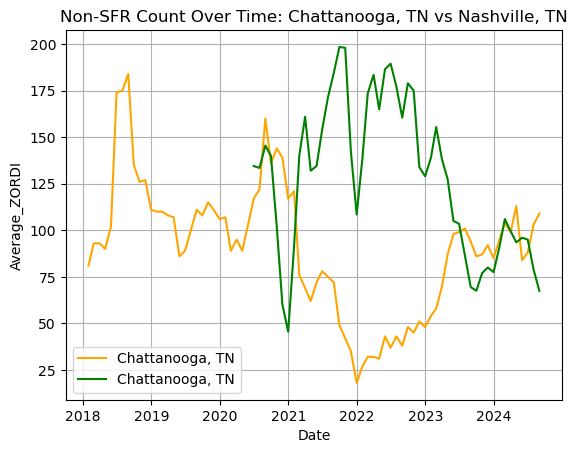

In [37]:
chatt_data = merged_df[merged_df['RegionName'] == 'Chattanooga, TN']
ZORDI_chatt = ZORDI_merged[ZORDI_merged['RegionName'] == 'Chattanooga, TN']
plt.plot(chatt_data['Date'], chatt_data['Non_SFR_Value'], label='Chattanooga, TN', color='orange')
plt.plot(ZORDI_chatt['Date'], ZORDI_chatt['Average_ZORDI'], label='Chattanooga, TN', color='green')
plt.title('Non-SFR Count Over Time: Chattanooga, TN vs Nashville, TN')
plt.xlabel('Date')
plt.ylabel('Non_SFR_Value')
plt.ylabel('Average_ZORDI')
plt.grid(True)
plt.legend()
plt.show()

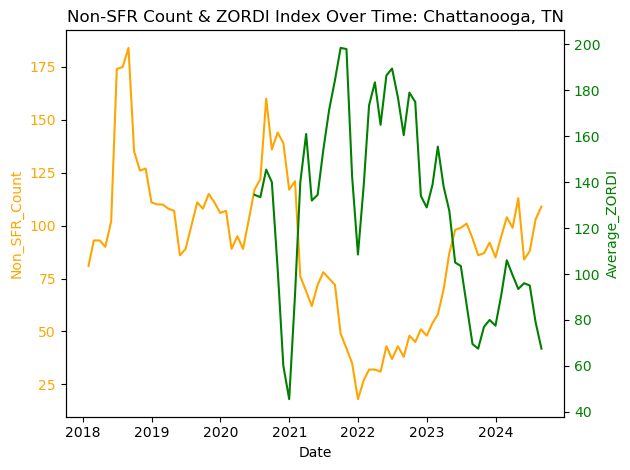

In [40]:
fig, ax1 = plt.subplots()

# Plot Non_SFR_Value on the left y-axis
ax1.plot(chatt_data['Date'], chatt_data['Non_SFR_Value'], color='orange', label='Chattanooga, TN (Listings)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Non_SFR_Count', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis sharing the same x-axis for ZORDI
ax2 = ax1.twinx()
ax2.plot(ZORDI_chatt['Date'], ZORDI_chatt['Average_ZORDI'], color='green', label='Chattanooga, TN (ZORDI Index)')
ax2.set_ylabel('Average_ZORDI', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and grid
plt.title('Non-SFR Count & ZORDI Index Over Time: Chattanooga, TN')
fig.tight_layout()

# Show the plot
plt.show()

C:\Users\Griffin Ziegler\AppData\Local\Temp\ipykernel_16176\2567098286.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chatt_data['Non_SFR_Value_Normalized'] = scaler.fit_transform(chatt_data[['Non_SFR_Value']])
C:\Users\Griffin Ziegler\AppData\Local\Temp\ipykernel_16176\2567098286.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ZORDI_chatt['Average_ZORDI_Normalized'] = scaler.fit_transform(ZORDI_chatt[['Average_ZORDI']])


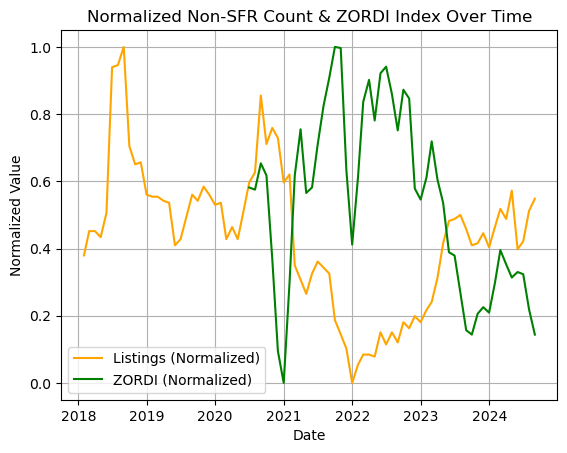

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing both columns to a 0-1 scale
scaler = MinMaxScaler()

# Normalize Non_SFR_Value and Average_ZORDI separately
chatt_data['Non_SFR_Value_Normalized'] = scaler.fit_transform(chatt_data[['Non_SFR_Value']])
ZORDI_chatt['Average_ZORDI_Normalized'] = scaler.fit_transform(ZORDI_chatt[['Average_ZORDI']])

# Now plot the normalized values on the same y-axis
plt.plot(chatt_data['Date'], chatt_data['Non_SFR_Value_Normalized'], color='orange', label='Listings (Normalized)')
plt.plot(ZORDI_chatt['Date'], ZORDI_chatt['Average_ZORDI_Normalized'], color='green', label='ZORDI (Normalized)')

plt.title('Normalized Non-SFR Count & ZORDI Index Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()